<a href="https://colab.research.google.com/github/kaisarmasum/IBM-Quantum-Challenge-2024/blob/main/lab_3_ai_transpiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
### Install Qiskit and relevant packages, if needed
!pip install qiskit[visualization]==1.0.2
!pip install qiskit_ibm_runtime
!pip install qiskit_aer
!pip install graphviz
!pip install qiskit-transpiler-service
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git
!pip install qiskit-code-assistant-jupyterlab

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-f2yw5a7_
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-f2yw5a7_
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 9ec0aa6ac3a7ff8650e274e3574ba18e62d1fd41
  Preparing metadata (setup.py) ... done


In [59]:
!pip install qiskit-transpiler-service--upgrade

ERROR: Could not find a version that satisfies the requirement qiskit-transpiler-service--upgrade (from versions: none)
ERROR: No matching distribution found for qiskit-transpiler-service--upgrade


In [60]:
%set_env QXToken=2dad4afe8e00693c1664e830bbdbf68510cdceddb8b56a140dd35ce0947602494fc318c40bb3502263bf05cfa9f155d28af55d635737f4bff028b3b593a46042

env: QXToken=2dad4afe8e00693c1664e830bbdbf68510cdceddb8b56a140dd35ce0947602494fc318c40bb3502263bf05cfa9f155d28af55d635737f4bff028b3b593a46042


In [61]:
# qc-grader should be 0.18.10 (or higher)
import qc_grader

qc_grader.__version__

'0.18.10'

In [62]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_transpiler_service.transpiler_service import TranspilerService

In [63]:
# Import for grader
from qc_grader.challenges.iqc_2024 import grade_lab3_ait_ex1, grade_lab3_ait_ex2

In [64]:
NUM_QUBITS = 61

Original circuit -> Depth: 65, CNOTs: 61


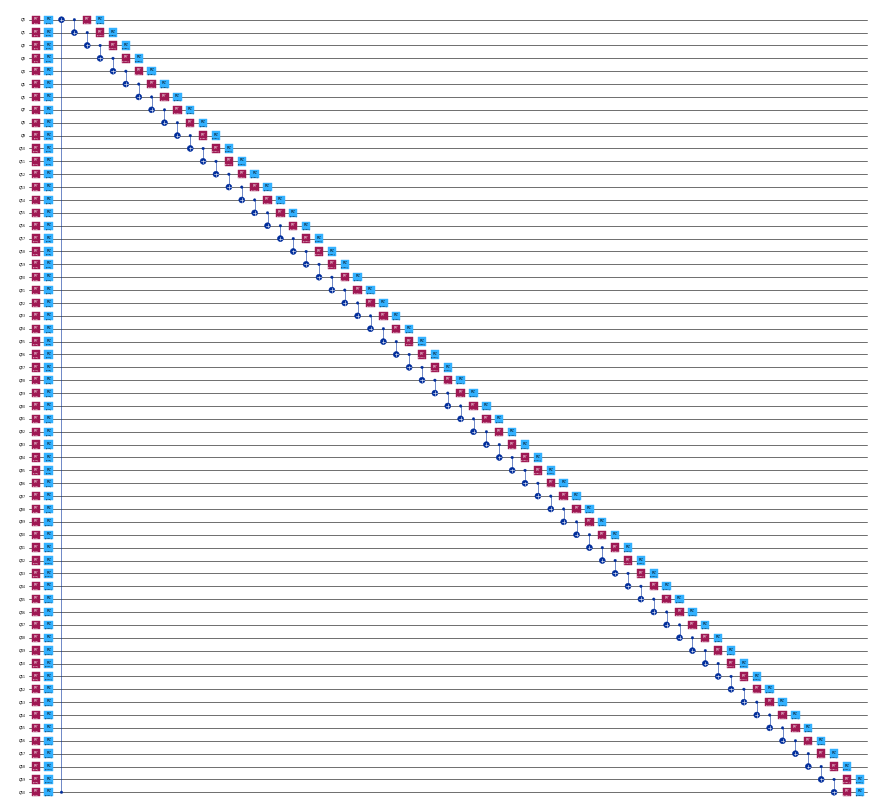

In [65]:
circuit = EfficientSU2(NUM_QUBITS, entanglement="circular", reps=1).decompose()

print(f"Original circuit -> Depth: {circuit.depth()}, CNOTs: {circuit.num_nonlocal_gates()}")
circuit.draw(fold=-1, output="mpl", style="iqp", scale=0.2)

**Exercise 1:**

Let's set up the Qiskit Transpiler service to transpile our circuit on cloud. Ensure you have the latest version of Qiskit Transpiler Service installed and configured. We'll use the ibm_brisbane backend for this exercise. Set the backend and configure the transpiler with an optimization level of 3, without the AI flag turned on.

In [67]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="2dad4afe8e00693c1664e830bbdbf68510cdceddb8b56a140dd35ce0947602494fc318c40bb3502263bf05cfa9f155d28af55d635737f4bff028b3b593a46042",
    set_as_default=True,
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

In [68]:
transpiler_ai_false = TranspilerService(
    # Add your code here
    backend_name="ibm_brisbane",
    ai=False,
    optimization_level=3,
)

In [69]:
grade_lab3_ait_ex1(transpiler_ai_false)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [70]:
circuit_ai_false = transpiler_ai_false.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Transpiled without AI -> Depth: 1344, CNOTs: 367


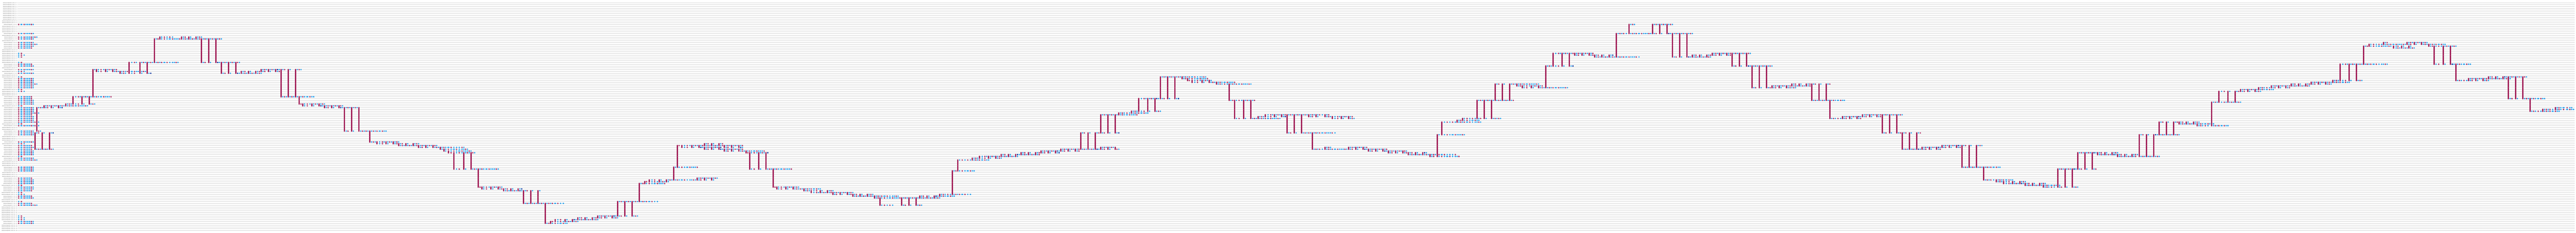

In [71]:
print(f"Transpiled without AI -> Depth: {circuit_ai_false.depth()}, CNOTs: {circuit_ai_false.num_nonlocal_gates()}")
circuit_ai_false.draw(fold=-1, output="mpl", scale=0.2)

**Exercise 2:**

Let's now use the Qiskit Transpiler service with the AI flag turned on. Ensure your environment is set up with the latest version of the Qiskit Transpiler Service. We'll continue to use the ibm_brisbane backend. Configure the transpiler with an optimization level of 3 and enable the AI flag to leverage advanced AI-powered optimizations. This setup will try to transpile your quantum circuits by utilizing AI to optimize gate counts and circuit depth.

In [72]:
transpiler_ai_true = TranspilerService(
    # Add your code here
     # Add your code here
    backend_name="ibm_brisbane",
    ai=True,
    optimization_level=3,
)

In [73]:
# Submit your answer using following code

grade_lab3_ait_ex2(transpiler_ai_true) # Expected result type: TranspilerService

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [74]:
circuit_ai_true = transpiler_ai_true.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Transpiled with AI -> Depth: 275, CNOTs: 64


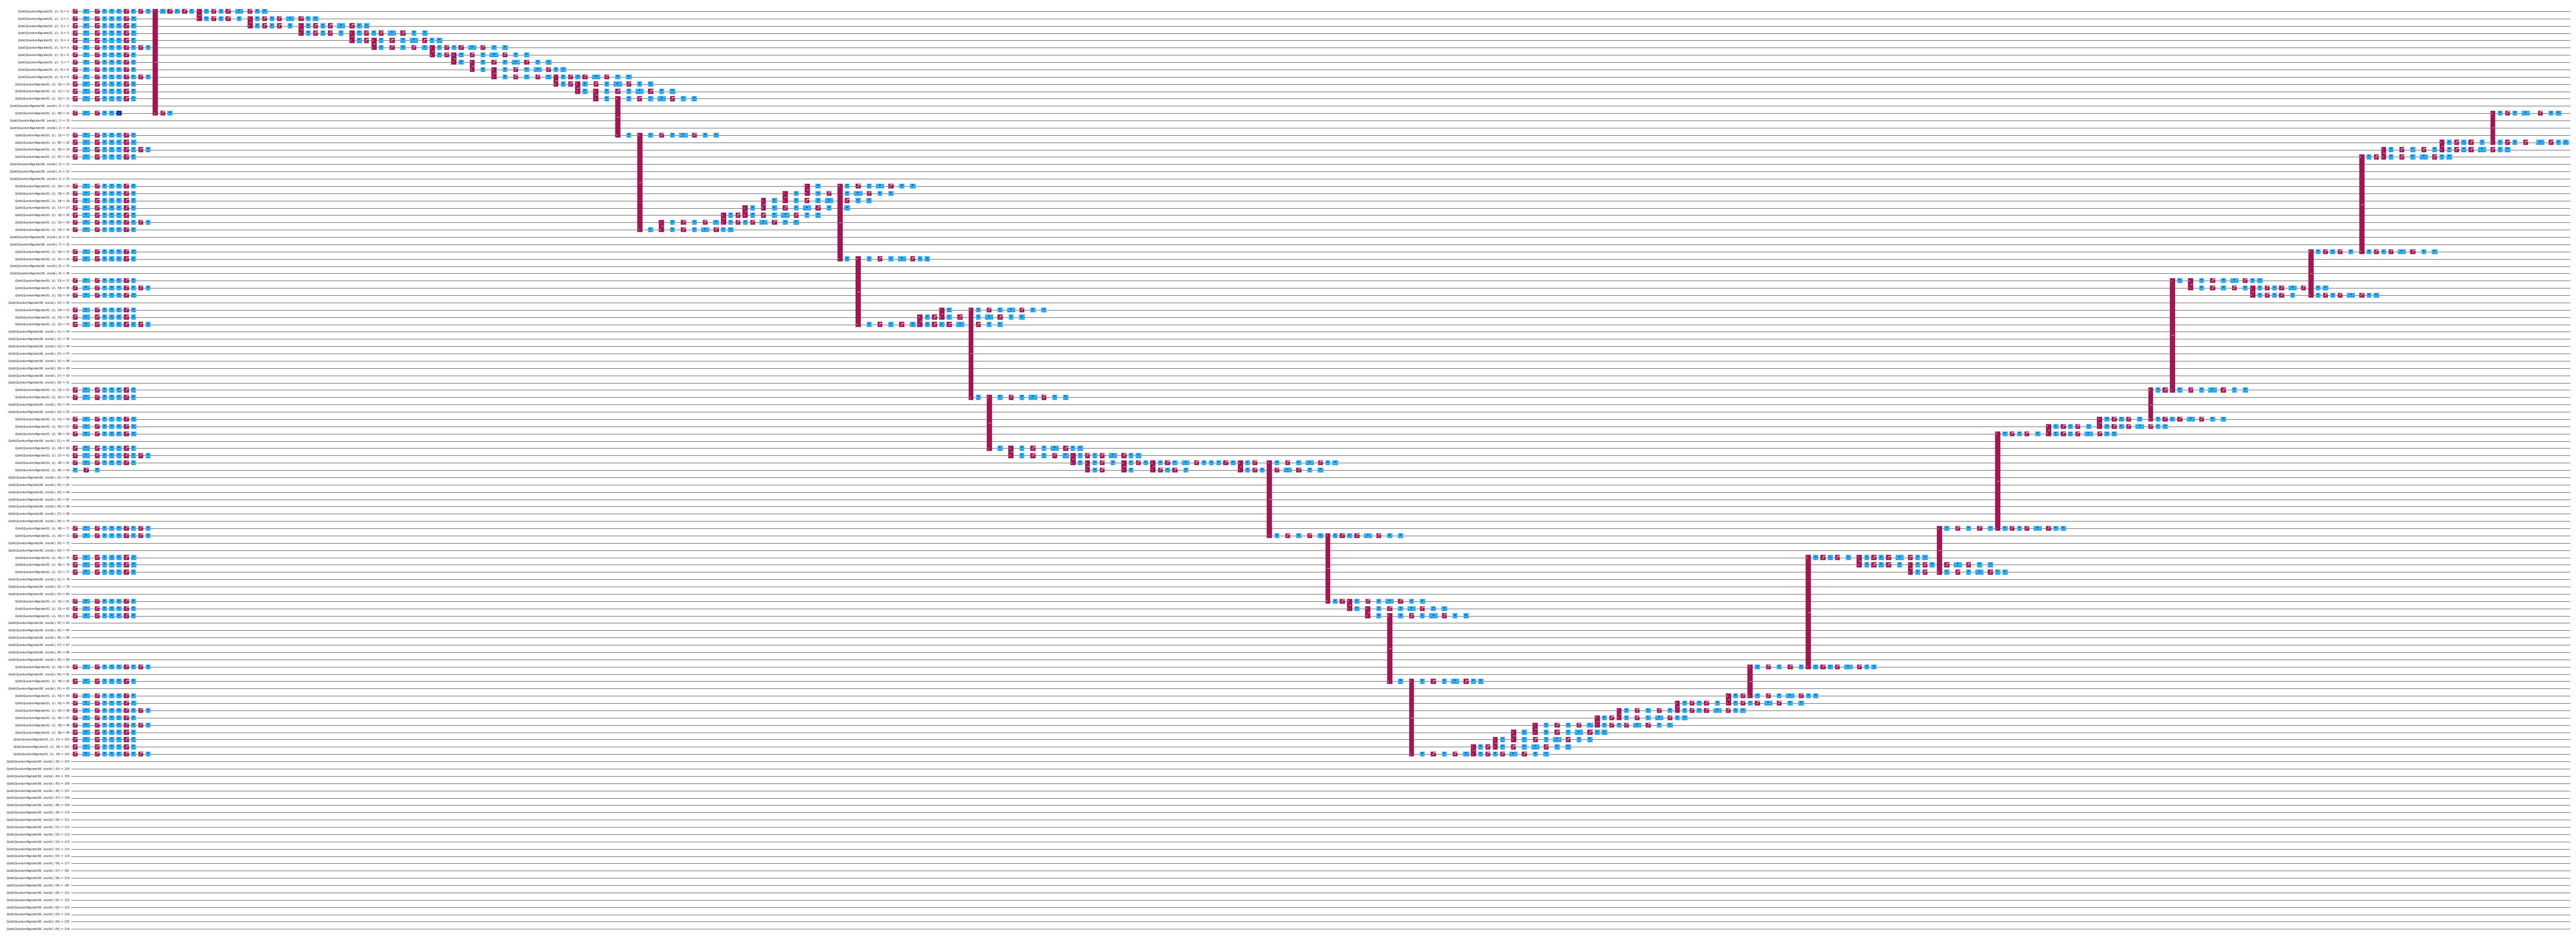

In [75]:
print(f"Transpiled with AI -> Depth: {circuit_ai_true.depth()}, CNOTs: {circuit_ai_true.num_nonlocal_gates()}")
circuit_ai_true.draw(fold=-1, output="mpl", scale=0.2)

In [76]:
# Transpiling locally using Qiskit SDK
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

In [77]:
# Run and compile results
num_qubits = [11, 21, 41, 61, 81]
num_cnots_local = []
num_cnots_with_ai = []
num_cnots_without_ai = []

for nq in num_qubits:
    circuit = EfficientSU2(nq, entanglement="circular", reps=1).decompose()

    # Using the Transpiler locally on Qiskit
    circuit_local = pm.run(circuit)
    # Using the transpiler service without AI
    circuit_without_ai = transpiler_ai_false.run(circuit)
    # Using the transpiler service with AI
    circuit_with_ai = transpiler_ai_true.run(circuit)

    num_cnots_local.append(circuit_local.num_nonlocal_gates())
    num_cnots_without_ai.append(circuit_without_ai.num_nonlocal_gates())
    num_cnots_with_ai.append(circuit_with_ai.num_nonlocal_gates())

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_tr

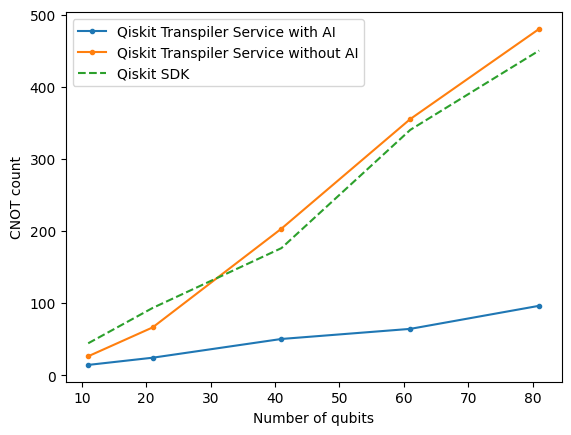

In [78]:
plt.plot(num_qubits, num_cnots_with_ai, '.-')
plt.plot(num_qubits, num_cnots_without_ai, '.-')
plt.plot(num_qubits, num_cnots_local, '--')
plt.xlabel("Number of qubits")
plt.ylabel("CNOT count")
plt.legend(["Qiskit Transpiler Service with AI", "Qiskit Transpiler Service without AI", "Qiskit SDK"])